In [153]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import statsmodels.api as snf
from sklearn.ensemble import RandomForestClassifier

In [154]:
w1 = pd.read_excel(r'D:\ALY6020\3\marketing_campaign.xlsx') #read the file
w1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [155]:
w1.info() # Check the type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [156]:
np.any(pd.isnull(w1))   #estimate exist of NaN
col_null= w1.isnull().sum(axis=0) # count all NaN data
col_null

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [157]:
w2=w1.dropna(axis=0, how='any')   #delete NaN values
w2.reset_index(drop=True, inplace=True)    # reset index

In [158]:
w2.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [159]:
cols = ['Education','Marital_Status','Dt_Customer']     # replace str with number

def convert_item(item):
    return np.argwhere(uni == item)[0,0]
for col in cols:
    uni = w2[col].unique()
    w2[col] = w2[col].map(convert_item)

w2.head()

C:\Users\91950\AppData\Local\Temp\ipykernel_4692\1809102892.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w2[col] = w2[col].map(convert_item)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,0,0,58138.0,0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,0,0,46344.0,1,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,0,1,71613.0,0,0,2,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,0,1,26646.0,1,0,3,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,1,2,58293.0,1,0,4,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [160]:
y = w2[['Response']]  #split data
X = w2.iloc[:, list(range(28))] #28 columns
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1) # build logistic model 
model=LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
model.score(X_train, y_train)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8572234762979684

In [161]:
predict_y = model.predict(X_test)          # confusion_matrix
confusion_matrix(y_test,predict_y, labels=[0,1])

array([[374,  11],
       [ 48,  11]], dtype=int64)

In [162]:
print(metrics.classification_report(y_test,predict_y))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       385
           1       0.50      0.19      0.27        59

    accuracy                           0.87       444
   macro avg       0.69      0.58      0.60       444
weighted avg       0.83      0.87      0.84       444



<AxesSubplot:>

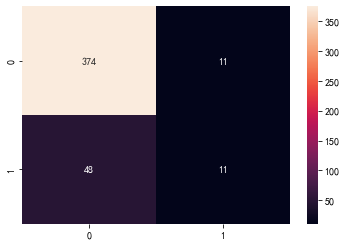

In [163]:
import seaborn as sns         # confusion_matrix visualization
colormetrics = metrics.confusion_matrix(y_test,predict_y)
sns.heatmap(colormetrics,annot = True,fmt = 'd')

In [164]:
coef_log = pd.DataFrame(model.coef_, columns = w2.columns[0:28])  # check coefficient
pd.set_option('display.max_columns',None)     # display complete columns
coef_log.round(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,-0.0,-0.001,-0.014,-0.021,-0.0,0.015,-0.026,-0.0,-0.025,0.002,-0.001,0.003,-0.002,0.002,0.002,0.025,0.044,0.041,-0.114,0.098,0.028,0.016,0.023,0.024,0.009,0.0,-0.0,-0.001


In [165]:
!pip install eli5                      #use permutation selection to array the features significance 

import eli5
from eli5.sklearn import PermutationImportance

 
perm = PermutationImportance(model, random_state=1).fit(X_test,y_test)

eli5.show_weights(perm, feature_names = X_test.columns.tolist())

ERROR: Invalid requirement: '#use'


Weight,Feature
0.0099 ± 0.0036,MntFishProducts
0.0086 ± 0.0100,Recency
0.0081 ± 0.0061,MntWines
0.0081 ± 0.0073,NumStorePurchases
0.0059 ± 0.0088,MntMeatProducts
0.0059 ± 0.0101,Income
0.0032 ± 0.0022,MntFruits
0.0005 ± 0.0018,Marital_Status
0 ± 0.0000,Kidhome
0.0000 ± 0.0049,MntGoldProds


part2:
From the output, we can see there are 28 independent variables that influence the subsciption. Among those variables, there are 8 features that are more important than others: MntFishProducts, Recency, MntWines, NumStorePurchases, MntMeatProducts, Income, MutFruits and Marital_Status. From these infomation, we know the relationship between subscriptions and those features. Based on the stronger relationship, we can alter our business strategies to target toward audiences with these traits more. 


In [166]:
from sklearn import svm

In [167]:
svm_model=svm.SVC(kernel='linear')            # build SVM model
svm_final=svm_model.fit(X_train, y_train)
print('Accuracy: ', svm_final.score(X_train, y_train))

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.8481941309255079


In [168]:
predict_y1 = svm_final.predict(X_test)          # confusion_matrix 
confusion_matrix(y_test,predict_y1, labels=[0,1])

array([[374,  11],
       [ 46,  13]], dtype=int64)

In [169]:
print(metrics.classification_report(y_test,predict_y1))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       385
           1       0.54      0.22      0.31        59

    accuracy                           0.87       444
   macro avg       0.72      0.60      0.62       444
weighted avg       0.84      0.87      0.85       444



<AxesSubplot:>

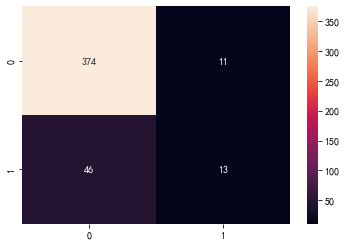

In [170]:
import seaborn as sns                 # confusion_matrix visualization
colormetrics = metrics.confusion_matrix(y_test,predict_y1)
sns.heatmap(colormetrics,annot = True,fmt = 'd')

In [171]:
coef_log = pd.DataFrame(svm_final.coef_, columns = w2.columns[0:28])

pd.set_option('display.max_columns',None)
coef_log.round(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,-0.015,5.328,-12.421,-46.806,-0.078,22.933,-22.435,-1.093,-34.655,3.049,-3.147,5.771,-5.369,-0.281,4.246,0.314,29.96,31.635,-117.047,56.028,36.0,16.565,32.0,36.415,14.0,1.0,-0.0,-0.0


In [172]:
perm = PermutationImportance(svm_final, random_state=1).fit(X_test,y_test)

eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0766 ± 0.0341,MntMeatProducts
0.0698 ± 0.0090,MntWines
0.0644 ± 0.0126,Income
0.0122 ± 0.0073,Recency
0.0086 ± 0.0141,MntGoldProds
0.0023 ± 0.0000,AcceptedCmp5
0.0023 ± 0.0040,NumWebPurchases
0.0018 ± 0.0034,NumCatalogPurchases
0.0009 ± 0.0054,Marital_Status
0.0009 ± 0.0022,ID


part3: 

From the output, we can see there are 28 independent variables that influence the subsciption. Among those variables, there are 10 features that are more important than others in SVM model: MntMeatProducts, MntWines, Income, Recency, MntGoldProds, AcceptedCmp5, NumWebPurchases, NumCatalogPurchases, Marital_Status, ID. ID probably can not account for any contribution in the outcome variable. From these infomation, we know the relationship between subscriptions and those features. Based on the stronger relationship, we can alter our business strategies to target toward audiences with these traits more. 

part4:

Logistic Regression Model
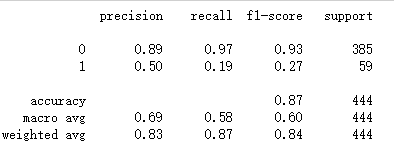




SVM 
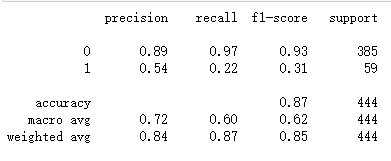



Above are the overall accuracy, precision and recall rate for both models: the overall accuracy rate are the same for both model, which is 87%. When outcome variable is 0, the precision and recall rate for both models are also the same, which are 89% and 97%. However, when outcome variable is 1, the precision rate of SVM is 54%, while that for logistic regression model is only 50%. Same situation happens for the recall rate, it is only 19% for logistic regression model, but it is 22% for SVM. Based on these three metrics, I recommend SVM over logistic regression model. The former also gives more important weighted features than logistic regression model. 